https://wolfscie.wordpress.com/2017/10/05/visualizing-wrf-domain/

In [3]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
ds1 = Dataset('../../../../WPS/geo_em.d01.nc')
ds2 = Dataset('../../../../WPS/geo_em.d02.nc')
ds3 = Dataset('../../../../WPS/geo_em.d03.nc')

15s_geo_em.d01.nc              Show_wrf_domains_0.ipynb
15s_geo_em.d02.nc              Show_wrf_domains.ipynb
15s_geo_em.d03.nc              Show_wrf_domains-v2.ipynb
1m_geo_em.d01.nc               Show_wrf_vars.ipynb
1m_geo_em.d02.nc               sodar_20130310_30_200_wrf_d03.png
1m_geo_em.d03.nc               temp
30s_geo_em.d01.nc              Terrain1m_geogrid.png
30s_geo_em.d02.nc              Terrain1m.png
30s_geo_em.d03.nc              Terrain30s.png
direc                          terrain_height.ipynb
extract_wrf_vars_d01.ipynb     TerrainWRF.png
extract_wrf_vars_d01-v1.ipynb  untitled1.txt
extract_wrf_vars_d02.ipynb     wind
extract_wrf_vars_d02-v1.ipynb  wrf_gfs_les_d1.pk
extract_wrf_vars_d03.ipynb     wrf_gfs_les_d3.pk
extract_wrf_vars_d03-v1.ipynb  wrf_nam_les_d1.pk
geogrid_height.ipynb           wrf_nam_les_d2.pk
namelist.wps                   wrf_nam_les_d3.pk
pygrib_plot_nam.ipynb          wrf_stats.ipynb


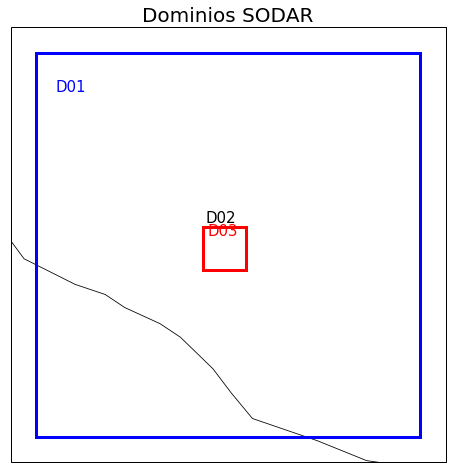

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim
import cartopy.crs as ccrs

def get_plot_element(infile):
    ncfile = Dataset(infile, 'r')
    ter = getvar(ncfile, 'ter')
    lats, lons = latlon_coords(ter)
    cart_proj = get_cartopy(ter)
    xlim = cartopy_xlim(ter)
    ylim = cartopy_ylim(ter)
    ncfile.close()
    return cart_proj, xlim, ylim

dataset = Dataset('30s_geo_em.d02.nc', 'r')
ter = dataset.variables['HGT_M'][0, :, :]
lats = dataset.variables['XLAT_M'][0, :]
lons = dataset.variables['XLONG_M'][0, :]
x,y = np.meshgrid(lons[0,:],lats[:,0])

infile_d01 = '../../../../WPS/geo_em.d01.nc'
cart_proj, xlim_d01, ylim_d01 = get_plot_element(infile_d01)
 
infile_d02 = '../../../../WPS/geo_em.d03.nc'
_, xlim_d02, ylim_d02 = get_plot_element(infile_d02)
 
infile_d03 = '../../../../WPS/geo_em.d03.nc'
_, xlim_d03, ylim_d03 = get_plot_element(infile_d03)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=cart_proj)
ax.coastlines('50m', linewidth=0.8)
# contour levels
clevs = np.arange(0,3000,100)
# contour plot and labels
ax.contour(x, y, ter, clevs, transform=ccrs.LambertConformal(), zorder=5) 
#ax.pcolormesh(lons, lats, ter, transform=ccrs.LambertConformal(), cmap='terrain', zorder=9)

# d01
ax.set_xlim([xlim_d01[0]-(xlim_d01[1]-xlim_d01[0])/15, xlim_d01[1]+(xlim_d01[1]-xlim_d01[0])/15])
ax.set_ylim([ylim_d01[0]-(ylim_d01[1]-ylim_d01[0])/15, ylim_d01[1]+(ylim_d01[1]-ylim_d01[0])/15])
 
# d01 box
ax.add_patch(mpl.patches.Rectangle((xlim_d01[0], ylim_d01[0]), xlim_d01[1]-xlim_d01[0], ylim_d01[1]-ylim_d01[0],
             fill=None, lw=3, edgecolor='blue', zorder=10))
ax.text(xlim_d01[0]+(xlim_d01[1]-xlim_d01[0])*0.05, ylim_d01[0]+(ylim_d01[1]-ylim_d01[0])*0.9, 'D01',
        size=15, color='blue', zorder=10)
 
# d02 box
ax.add_patch(mpl.patches.Rectangle((xlim_d02[0], ylim_d02[0]), xlim_d02[1]-xlim_d02[0], ylim_d02[1]-ylim_d02[0],
             fill=None, lw=3, edgecolor='black', zorder=10))
ax.text(xlim_d02[0]+(xlim_d02[1]-xlim_d02[0])*0.05, ylim_d02[0]+(ylim_d02[1]-ylim_d02[0])*1.1, 'D02',
        size=15, color='black', zorder=10)
 
# d03 box
ax.add_patch(mpl.patches.Rectangle((xlim_d03[0], ylim_d03[0]), xlim_d03[1]-xlim_d03[0], ylim_d03[1]-ylim_d03[0],
             fill=None, lw=3, edgecolor='red', zorder=10))
ax.text(xlim_d03[0]+(xlim_d03[1]-xlim_d03[0])*0.1, ylim_d03[0]+(ylim_d03[1]-ylim_d03[0])*0.8, 'D03',
        size=15, color='red', zorder=10)
ax.set_title('Dominios SODAR', size=20)

plt.show()

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing

dataset = Dataset('../../../../WPS/geo_em.d01.nc', 'r')
ter = dataset.variables['HGT_M'][0, :, :]
lats = dataset.variables['XLAT_M'][0, :]
lons = dataset.variables['XLONG_M'][0, :]
x,y = np.meshgrid(lons[0,:],lats[:,0])


ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()
ax.contour(x, y, ter)
ax.pcolormesh(x, y, ter, cmap='terrain')
ax.scatter(-103.6, 19.33, color='black')

# Draw a rectangle inside
lons = [x.min()+.5, x.min()+.5, x.max()-.5, x.max()-.5]
lats = [y.min()+.5, y.max()-.5, y.max()-.5, y.min()+.5]
ring = LinearRing(list(zip(lons, lats)))
ax.add_geometries([ring], ccrs.LambertConformal(), facecolor='none', lw=3, edgecolor='black')
ax.set_title('DOMINIO 1 ELEV', size=20)

plt.show()

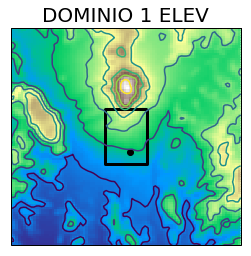

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing

dataset = Dataset('../../../../WPS/geo_em.d02.nc', 'r')
ter = dataset.variables['HGT_M'][0, :, :]
lats = dataset.variables['XLAT_M'][0, :]
lons = dataset.variables['XLONG_M'][0, :]
x,y = np.meshgrid(lons[0,:],lats[:,0])


ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()
ax.contour(x, y, ter)
ax.pcolormesh(x, y, ter, cmap='terrain')
ax.scatter(-103.6, 19.33, color='black')

# Draw a rectangle inside
lons = [x.min()+.5, x.min()+.5, x.max()-.5, x.max()-.5]
lats = [y.min()+.5, y.max()-.5, y.max()-.5, y.min()+.5]
ring = LinearRing(list(zip(lons, lats)))
ax.add_geometries([ring], ccrs.LambertConformal(), facecolor='none', lw=3, edgecolor='black')
ax.set_title('DOMINIO 1 ELEV', size=20)

plt.show()

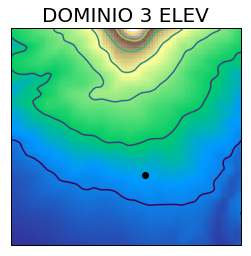

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing

dataset = Dataset('../../../../WPS/geo_em.d03.nc', 'r')
ter = dataset.variables['HGT_M'][0, :, :]
lats = dataset.variables['XLAT_M'][0, :]
lons = dataset.variables['XLONG_M'][0, :]
x,y = np.meshgrid(lons[0,:],lats[:,0])


ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()
ax.contour(x, y, ter)
ax.pcolormesh(x, y, ter, cmap='terrain')

# Draw a rectangle inside
ax.scatter(-103.6, 19.33, color='black', label='sodar')

ax.set_title('DOMINIO 3 ELEV', size=20)

plt.show()

In [59]:
print(x.min()+(x.max()-x.min())/2, y.min()+(y.max()-y.min())/2)

-103.5999984741211 19.330848693847656


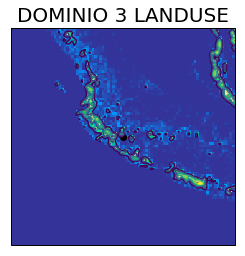

In [119]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing

dataset = Dataset('30s_geo_em.d01.nc', 'r')
var = dataset.variables['LANDUSEF'][0, 1, :, :]
lats = dataset.variables['XLAT_M'][0, :]
lons = dataset.variables['XLONG_M'][0, :]
x,y = np.meshgrid(lons[0,:],lats[:,0])


ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()
ax.contour(x, y, var)
ax.pcolormesh(x, y, var, cmap='terrain')

# Draw a rectangle inside
ax.scatter(-103.6, 19.33, color='black', label='sodar')

ax.set_title('DOMINIO 3 LANDUSE', size=20)

plt.show()

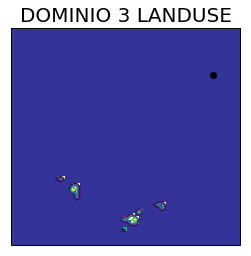

In [121]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing

dataset = Dataset('30s_geo_em.d03.nc', 'r')
var = dataset.variables['LANDUSEF'][0, 20, :, :]
lats = dataset.variables['XLAT_M'][0, :]
lons = dataset.variables['XLONG_M'][0, :]
x,y = np.meshgrid(lons[0,:],lats[:,0])


ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()
ax.contour(x, y, var)
ax.pcolormesh(x, y, var, cmap='terrain')

# Draw a rectangle inside
ax.scatter(-103.6, 19.33, color='black', label='sodar')

ax.set_title('DOMINIO 3 LANDUSE', size=20)

plt.show()

In [26]:
dataset.variables.keys()

odict_keys(['Times', 'XLAT_M', 'XLONG_M', 'XLAT_V', 'XLONG_V', 'XLAT_U', 'XLONG_U', 'CLAT', 'CLONG', 'MAPFAC_M', 'MAPFAC_V', 'MAPFAC_U', 'MAPFAC_MX', 'MAPFAC_VX', 'MAPFAC_UX', 'MAPFAC_MY', 'MAPFAC_VY', 'MAPFAC_UY', 'E', 'F', 'SINALPHA', 'COSALPHA', 'LANDMASK', 'XLAT_C', 'XLONG_C', 'SINALPHA_U', 'COSALPHA_U', 'SINALPHA_V', 'COSALPHA_V', 'LANDUSEF', 'LU_INDEX', 'HGT_M', 'SOILTEMP', 'SOILCTOP', 'SCT_DOM', 'SOILCBOT', 'SCB_DOM', 'ALBEDO12M', 'GREENFRAC', 'LAI12M', 'SNOALB', 'SLOPECAT', 'CON', 'VAR', 'OA1', 'OA2', 'OA3', 'OA4', 'OL1', 'OL2', 'OL3', 'OL4', 'VAR_SSO', 'LAKE_DEPTH', 'URB_PARAM'])

In [100]:
print(dataset.variables['LANDUSEF'])
dataset.variables['LANDUSEF'][0, 8, :, :]
#LANDUSEF(Time, land_cat, south_north, west_east)

<class 'netCDF4._netCDF4.Variable'>
float32 LANDUSEF(Time, land_cat, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    units: category
    description: Noah-modified 21-category IGBP-MODIS landuse
    stagger: M
    sr_x: 1
    sr_y: 1
unlimited dimensions: Time
current shape = (1, 21, 89, 89)
filling on, default _FillValue of 9.969209968386869e+36 used



array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0989011 , 0.        ,
        0.14835165],
       [0.        , 0.        , 0.        , ..., 0.11290322, 0.13043478,
        0.1160221 ],
       [0.        , 0.        , 0.        , ..., 0.21978022, 0.10614525,
        0.        ]], dtype=float32)

In [21]:
dataset.variables['SOILTEMP'][0, :, :].shape

(89, 89)

In [34]:
print(dataset.variables['LANDMASK'].shape)
print(dataset.variables['LANDMASK'])
#LANDMASK(Time, south_north, west_east)

(1, 89, 89)
<class 'netCDF4._netCDF4.Variable'>
float32 LANDMASK(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    units: none
    description: Landmask : 1=land, 0=water
    stagger: M
    sr_x: 1
    sr_y: 1
unlimited dimensions: Time
current shape = (1, 89, 89)
filling on, default _FillValue of 9.969209968386869e+36 used



In [120]:
dataset.variables['LANDUSEF'][0, 1, :, :]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.21428572, 0.8131868 ,
        0.03846154],
       [0.        , 0.        , 0.        , ..., 0.07526882, 0.33695653,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01117318,
        0.        ]], dtype=float32)